In [2194]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


Exploratory Data Analysis

explanation about eda

In [2195]:
train = pd.read_csv('~/Documents/AmesHousingML/Ames_HousePrice.csv') 

In [2196]:
train.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [2197]:
train.drop(columns="Unnamed: 0",inplace=True)

In [2198]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [2199]:
train.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2566.000000,2579.000000,2579.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2578.000000,2578.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2451.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,444.346258,53.238852,539.101590,1036.686700,1144.975194,336.820155,4.244574,0.435221,0.062064,1.550775,0.378295,2.850388,1.04031,6.387209,0.604264,1976.982048,1.747577,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,175.872330,429.334957,174.423920,425.199639,418.555417,375.958955,424.072452,44.403603,0.518827,0.244513,0.545825,0.499237,0.822863,0.20255,1.535186,0.648604,24.659801,0.738678,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,215.000000,792.000000,871.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1960.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1978.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,158.000000,732.000000,0.000000,784.000000,1266.500000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.00000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


# Data Preprocessing and Cleaning

In [2200]:
train.shape

(2580, 81)

In [2201]:
train = train.drop_duplicates()

In [2202]:
nulls = train.isnull().sum()
nulls[nulls > 0]

LotFrontage      462
Alley           2411
MasVnrType        14
MasVnrArea        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinSF1         1
BsmtFinType2      70
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1241
GarageType       127
GarageYrBlt      129
GarageFinish     129
GarageCars         1
GarageArea         1
GarageQual       129
GarageCond       129
PoolQC          2570
Fence           2054
MiscFeature     2482
dtype: int64

For no particular reason, I'll start data cleaning with garage and its following columns to remove nan for a more complete dataframe.

In [2203]:
train.GarageType.unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [2204]:
train['GarageType'].fillna('NoGarage', inplace=True)

In [2205]:
train.GarageType.unique()

array(['Detchd', 'Attchd', 'BuiltIn', 'Basment', 'NoGarage', '2Types',
       'CarPort'], dtype=object)

In [2206]:
train[train.GarageYrBlt.isna()].GarageType.unique()

array(['NoGarage', 'Detchd'], dtype=object)

In [2207]:
train['GarageYrBlt'].fillna(0, inplace=True)

In [2208]:
train['GarageType'].fillna(0, inplace=True)

In [2209]:
train['GarageFinish'].fillna('NoGarage', inplace=True)

In [2210]:
train['GarageQual'].fillna('NoGarage', inplace=True)

In [2211]:
train['GarageCond'].fillna('NoGarage', inplace=True)

In [2212]:
train['Alley'].fillna('NoAlley', inplace=True)

In [2213]:
train.Neighborhood.unique()

array(['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 'Blmngtn',
       'Mitchel', 'NridgHt', 'NAmes', 'CollgCr', 'SawyerW', 'MeadowV',
       'BrDale', 'Gilbert', 'Timber', 'Somerst', 'BrkSide', 'NoRidge',
       'Sawyer', 'Crawfor', 'Greens', 'ClearCr', 'GrnHill', 'StoneBr',
       'Veenker', 'NPkVill', 'Blueste', 'Landmrk'], dtype=object)

In [2214]:
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'CollgCr'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'Somerst'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'Gilbert'").median())
print(train[["LotFrontage", "Neighborhood"]].query("Neighborhood == 'BrDale'").median())

LotFrontage    70.0
dtype: float64
LotFrontage    72.0
dtype: float64
LotFrontage    63.0
dtype: float64
LotFrontage    21.0
dtype: float64


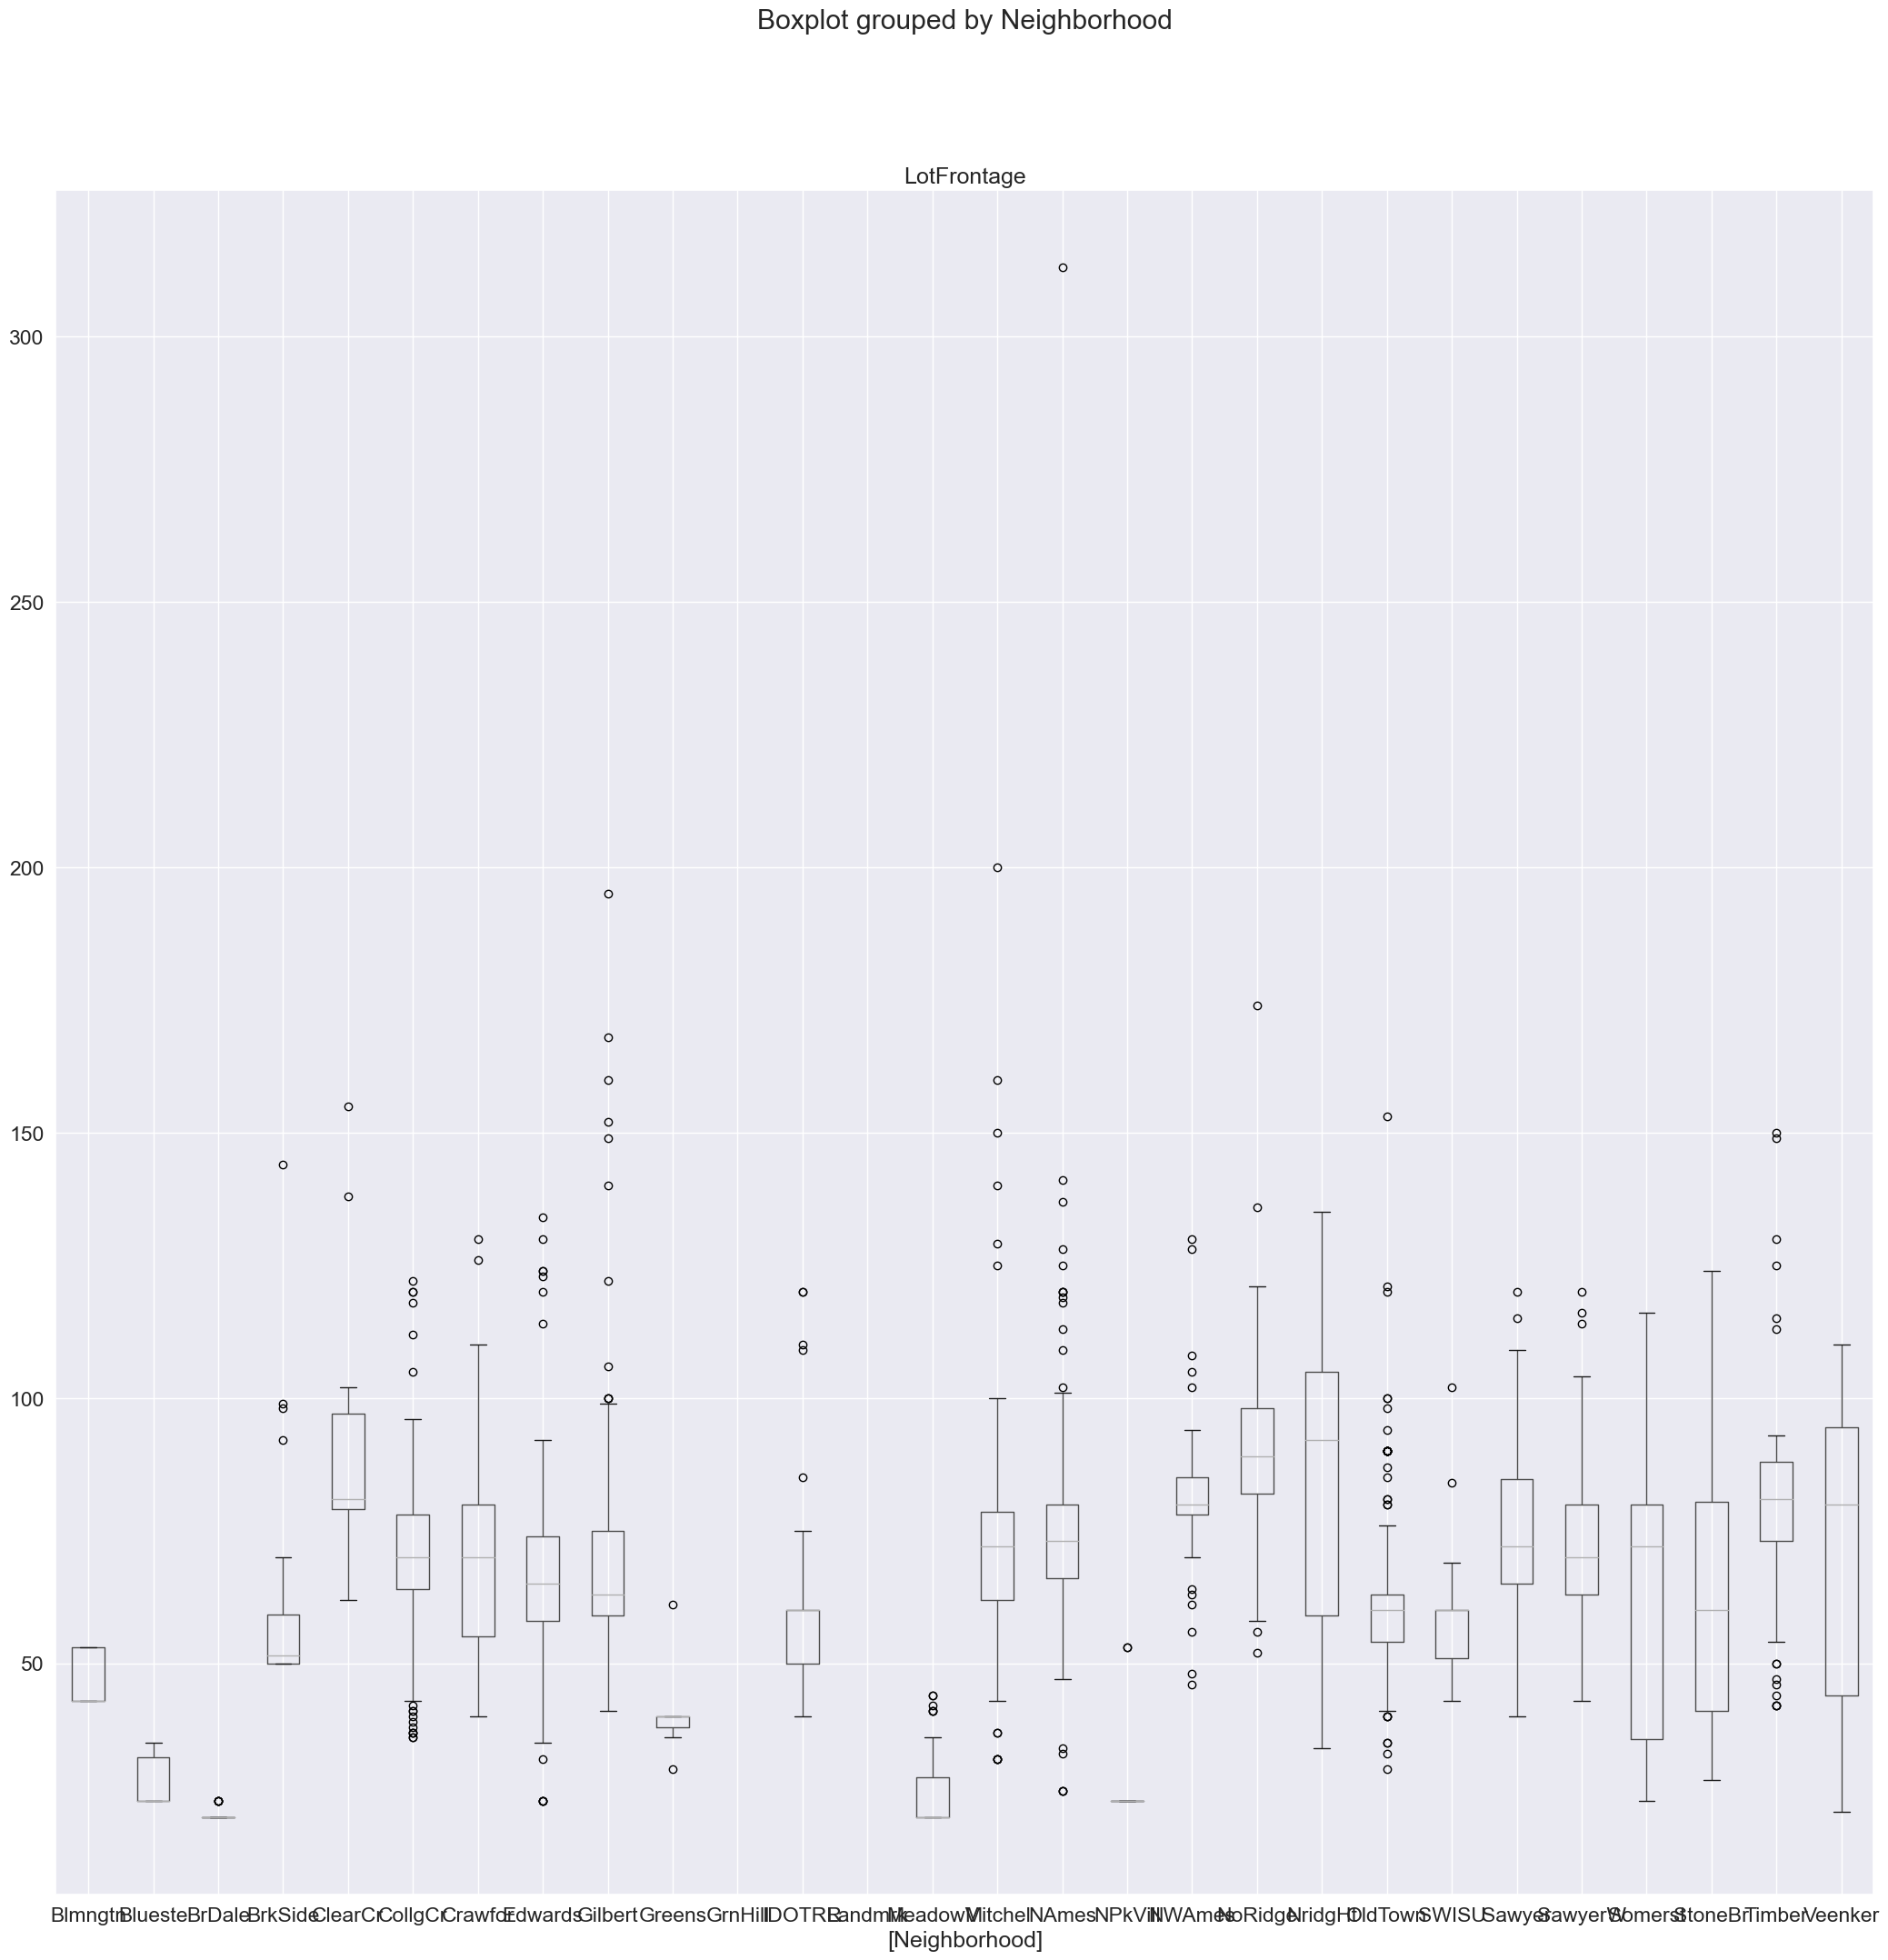

In [2215]:
fig = train[['LotFrontage', 'Neighborhood']].boxplot(by='Neighborhood')
#plt.xticks(rotation=90)
plt.show()

I saw that the median values for each neighborhood varied, therefore I believe it would be irresponsible to use a shared median or mean among all missing values. Therefore, I will use the median value specific to the neighborhood that the house is located.

In [2216]:
# Fill missing values in 'LotFrontage' column with median based on 'Neighborhood'
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [2217]:
train.FireplaceQu.unique()

array(['Gd', nan, 'Ex', 'TA', 'Fa', 'Po'], dtype=object)

In [2218]:
train['FireplaceQu'].fillna("NoFireplace", inplace=True)

In [2219]:
train.MasVnrType.unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

In [2220]:
train['MasVnrType'].fillna("None", inplace=True)

In [2221]:
train['MasVnrArea'].fillna(0, inplace=True)

In [2222]:
print(train.BsmtQual.unique())
print(train.BsmtCond.unique())
print(train.BsmtExposure.unique())
print(train.BsmtFinType1.unique())
print(train.BsmtFinType2.unique())

['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
['No' 'Mn' nan 'Gd' 'Av']
['Rec' 'GLQ' 'ALQ' 'Unf' nan 'BLQ' 'LwQ']
['Unf' 'ALQ' nan 'GLQ' 'BLQ' 'LwQ' 'Rec']


In [2223]:
train['BsmtQual'].fillna("NoBsmt", inplace=True)
train['BsmtCond'].fillna("NoBsmt", inplace=True)
train['BsmtExposure'].fillna("NoBsmt", inplace=True)
train['BsmtFinType1'].fillna("NoBsmt", inplace=True)
train['BsmtFinType2'].fillna("NoBsmt", inplace=True)

In [2224]:
train.Electrical.value_counts()

SBrkr    2364
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

In [2225]:
train['Electrical'].fillna("SBrkr", inplace=True)

Below we evaluate MiscFeature, which seemed to have a large amount of null values.

In [2226]:
train.MiscFeature.unique()

array([nan, 'Shed', 'Othr', 'Gar2', 'TenC'], dtype=object)

In [2227]:
train.MiscFeature.value_counts()

Shed    88
Gar2     5
Othr     3
TenC     1
Name: MiscFeature, dtype: int64

In [2228]:
#looking at the total percentage of houses that include a MiscFeature... which is below 5%
((train.MiscFeature.isna().count() - train.MiscFeature.isna().sum()) / (train.MiscFeature.isna().count()) ) * 100

3.7611477316789452

In [2229]:
#I figure removing the column from the dataset may be better 
# and easier than trying to find a way to include it in the analysis
train.drop('MiscFeature', axis=1, inplace=True)

In [2230]:
# as well I have to remove the values associated with the MiscFeature
train.drop('MiscVal', axis=1, inplace=True)

Below I will do the same with PoolQC and PoolSF

In [2231]:
((train.PoolQC.isna().count() - train.PoolQC.isna().sum()) / (train.PoolQC.isna().count()) ) * 100

0.34897246994959286

In [2232]:
#I figure removing the column from the dataset may be better 
# and easier than trying to find a way to include it in the analysis
train.drop('PoolQC', axis=1, inplace=True)

In [2233]:
train.drop('PoolArea', axis=1, inplace=True)

In [2234]:
train['Fence'].fillna("NoFence", inplace=True)

In [2235]:
nulls = train.isnull().sum()
nulls[nulls > 0]

LotFrontage     3
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageCars      1
GarageArea      1
dtype: int64

In [2236]:
train[train.LotFrontage.isna()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
109,916253320,1502,330000,120,RM,NaN,9763,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,NoFence,9,2007,WD,Normal
683,916252170,1295,230000,120,RM,NaN,8239,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NoFireplace,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,NoFence,11,2006,WD,Normal
1204,907230240,1320,137000,160,RH,NaN,3612,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,0.0,0.0,2,1,3,1,TA,5,Typ,0,NoFireplace,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,MnPrv,6,2006,WD,Normal


In [2237]:
train

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,60.0,7890,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,NoFence,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NoFireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,NoFence,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NoFireplace,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,NoFence,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NoFireplace,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,NoFence,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NoFireplace,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,NoFence,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,51.5,8854,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,NoFence,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,65.0,13680,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,NoFence,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,GasA,TA,N,FuseA,1001,1001,0,0.0,0.0,2,0,4,2,TA,8,Typ,0,NoFireplace,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y,0,0,0,0,0,NoFence,8,2007,WD,Normal
2578,907192040,1842,217500,60,RL,70.0,8826,Pave,NoAlley,

In [2238]:
# used the following commented code to check specific cases of the LotFootage not cleaning correctly
# turns out there were a few neighborhoods that don't have any values in the column, very minimal ~3
# train[train.PID == 916253320]
# train.Neighborhood.value_counts()
train = train[(train['Neighborhood'] != 'GrnHill') & (train['Neighborhood'] != 'Landmrk')]

In [2239]:
#train[train['BsmtFinSF1'].isna()] #one edge case where there is no bsmt so set zeroes, same for rest
train['BsmtFinSF1'].fillna(0, inplace=True)   
train['BsmtFinSF2'].fillna(0, inplace=True)   
train['BsmtUnfSF'].fillna(0, inplace=True)   
train['TotalBsmtSF'].fillna(0, inplace=True)   
train['BsmtFullBath'].fillna(0, inplace=True)   
train['BsmtHalfBath'].fillna(0, inplace=True)   
train['GarageCars'].fillna(0, inplace=True)   
train['GarageArea'].fillna(0, inplace=True)   

In [2240]:
nulls = train.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

We have cleaned the missing values.

# Exploratory Data Analysis

The sale price of the houses in the dataset have a right skew.

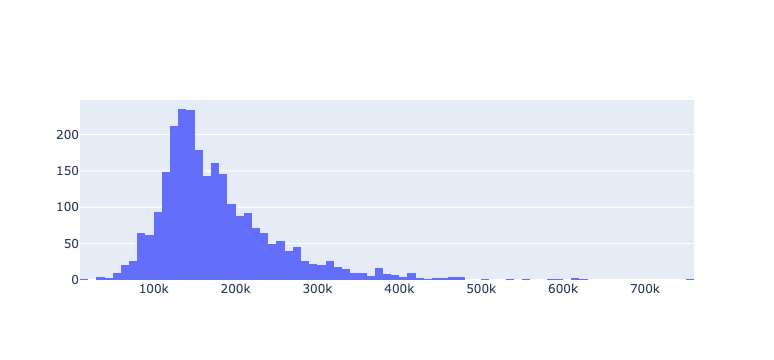

In [2241]:
sp_fig = go.Figure(data=[go.Histogram(x=train.SalePrice)])
sp_fig

In [2242]:
train.SalePrice.describe()

count      2576.000000
mean     177990.228261
std       75017.585880
min       12789.000000
25%      129900.000000
50%      159900.000000
75%      209500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [2243]:
train[train["SalePrice"] < 35000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition
427,902207130,832,12789,30,RM,68.0,9656,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,2,1923,1970,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,BrkTil,Fa,Fa,No,Unf,0.0,Unf,0.0,678.0,678.0,GasA,TA,N,SBrkr,832,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1928.0,Unf,2.0,780.0,Fa,Fa,N,0,0,0,0,0,NoFence,6,2010,WD,Abnorml
558,902477120,720,34900,30,C (all),60.0,7879,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495.0,Unf,0.0,225.0,720.0,GasA,TA,N,FuseA,720,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NoFireplace,NoGarage,0.0,NoGarage,0.0,0.0,NoGarage,NoGarage,N,0,523,115,0,0,GdWo,11,2009,WD,Abnorml


The mean is higher than the median, and we can see many outliers, which can impact the results of our models.

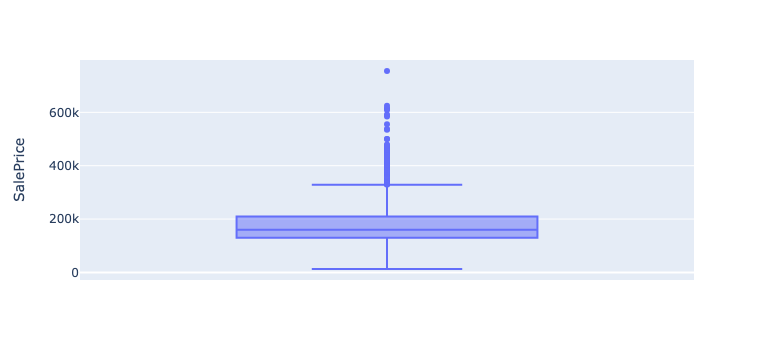

In [2244]:
px.box(train,y='SalePrice')

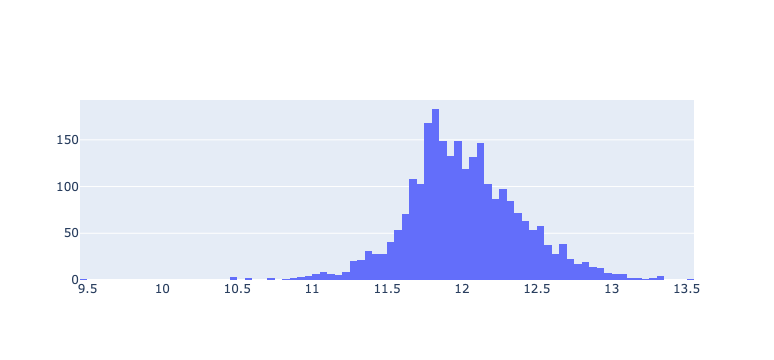

In [2245]:
go.Figure(data=[go.Histogram(x=np.log(train.SalePrice))])

In [2246]:
logSalePrice = np.log(train.SalePrice)

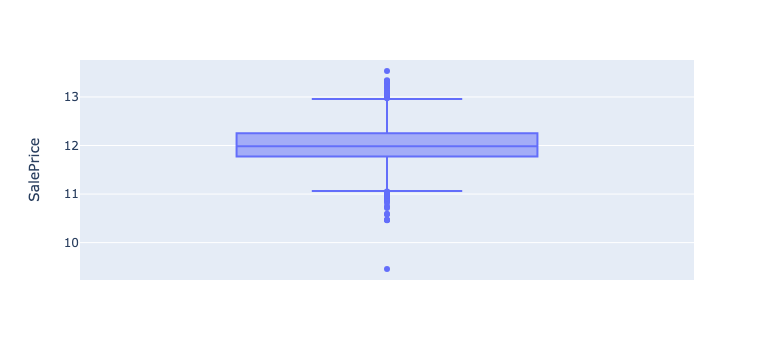

In [2247]:
px.box(logSalePrice,y='SalePrice')

As we can see, there are many outliers in the data. Although the typical accepted range is usually 1.5 times the IQR, we will do 3 times the IQR to try and conserve some of the value in those outliers

## Finding & Dealing with Outliers

In [2248]:
train.shape

(2576, 77)

In [2249]:
Q1 = train['SalePrice'].quantile(.25)
Q3 = train['SalePrice'].quantile(.75)
IQR = Q3 - Q1
new_bounds = Q3 + 3 * IQR

In [2250]:
train.drop(train[train['SalePrice'] > new_bounds].index, axis=0, inplace = True)

In [2251]:
train.shape

(2553, 77)

In [2252]:
#train set - outliers comes out to 23 records removed
2576 - 2553

23

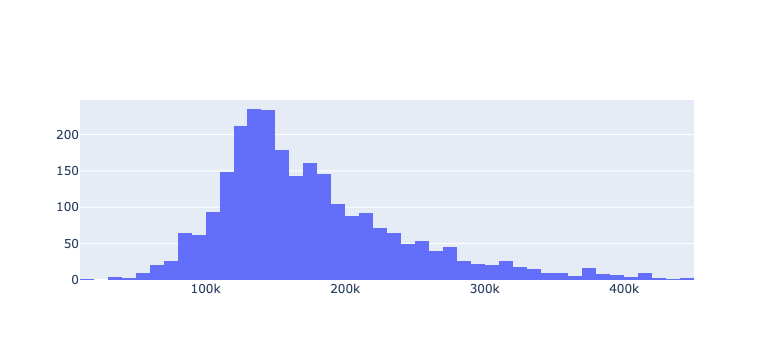

In [2253]:
go.Figure(data=[go.Histogram(x=train.SalePrice)])

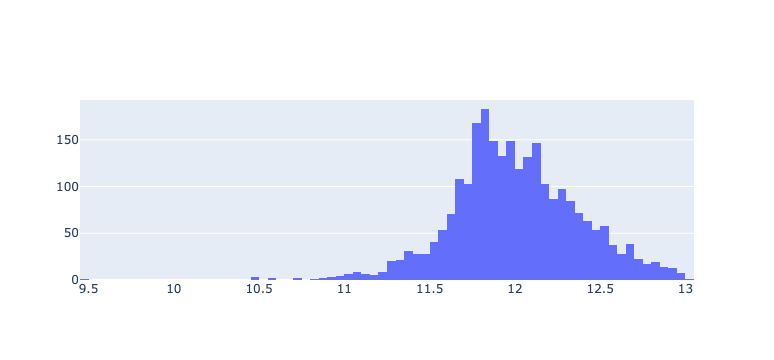

In [2254]:
go.Figure(data=[go.Histogram(x=np.log(train.SalePrice))])

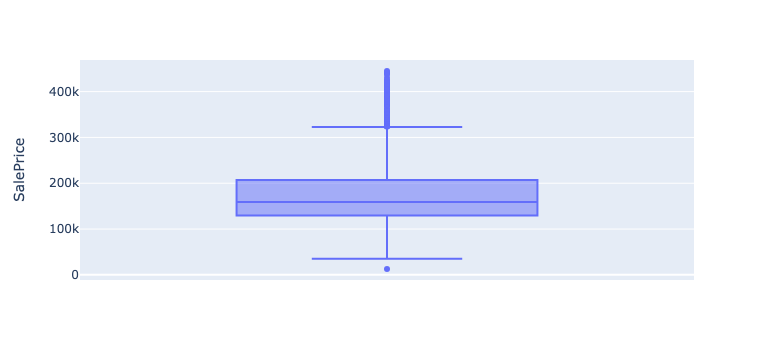

In [2255]:
px.box(train,y='SalePrice')

This now looks a bit better than our first box plot of the SalePrice untouched

Lets look at a correlation of the numeric features in the dataset

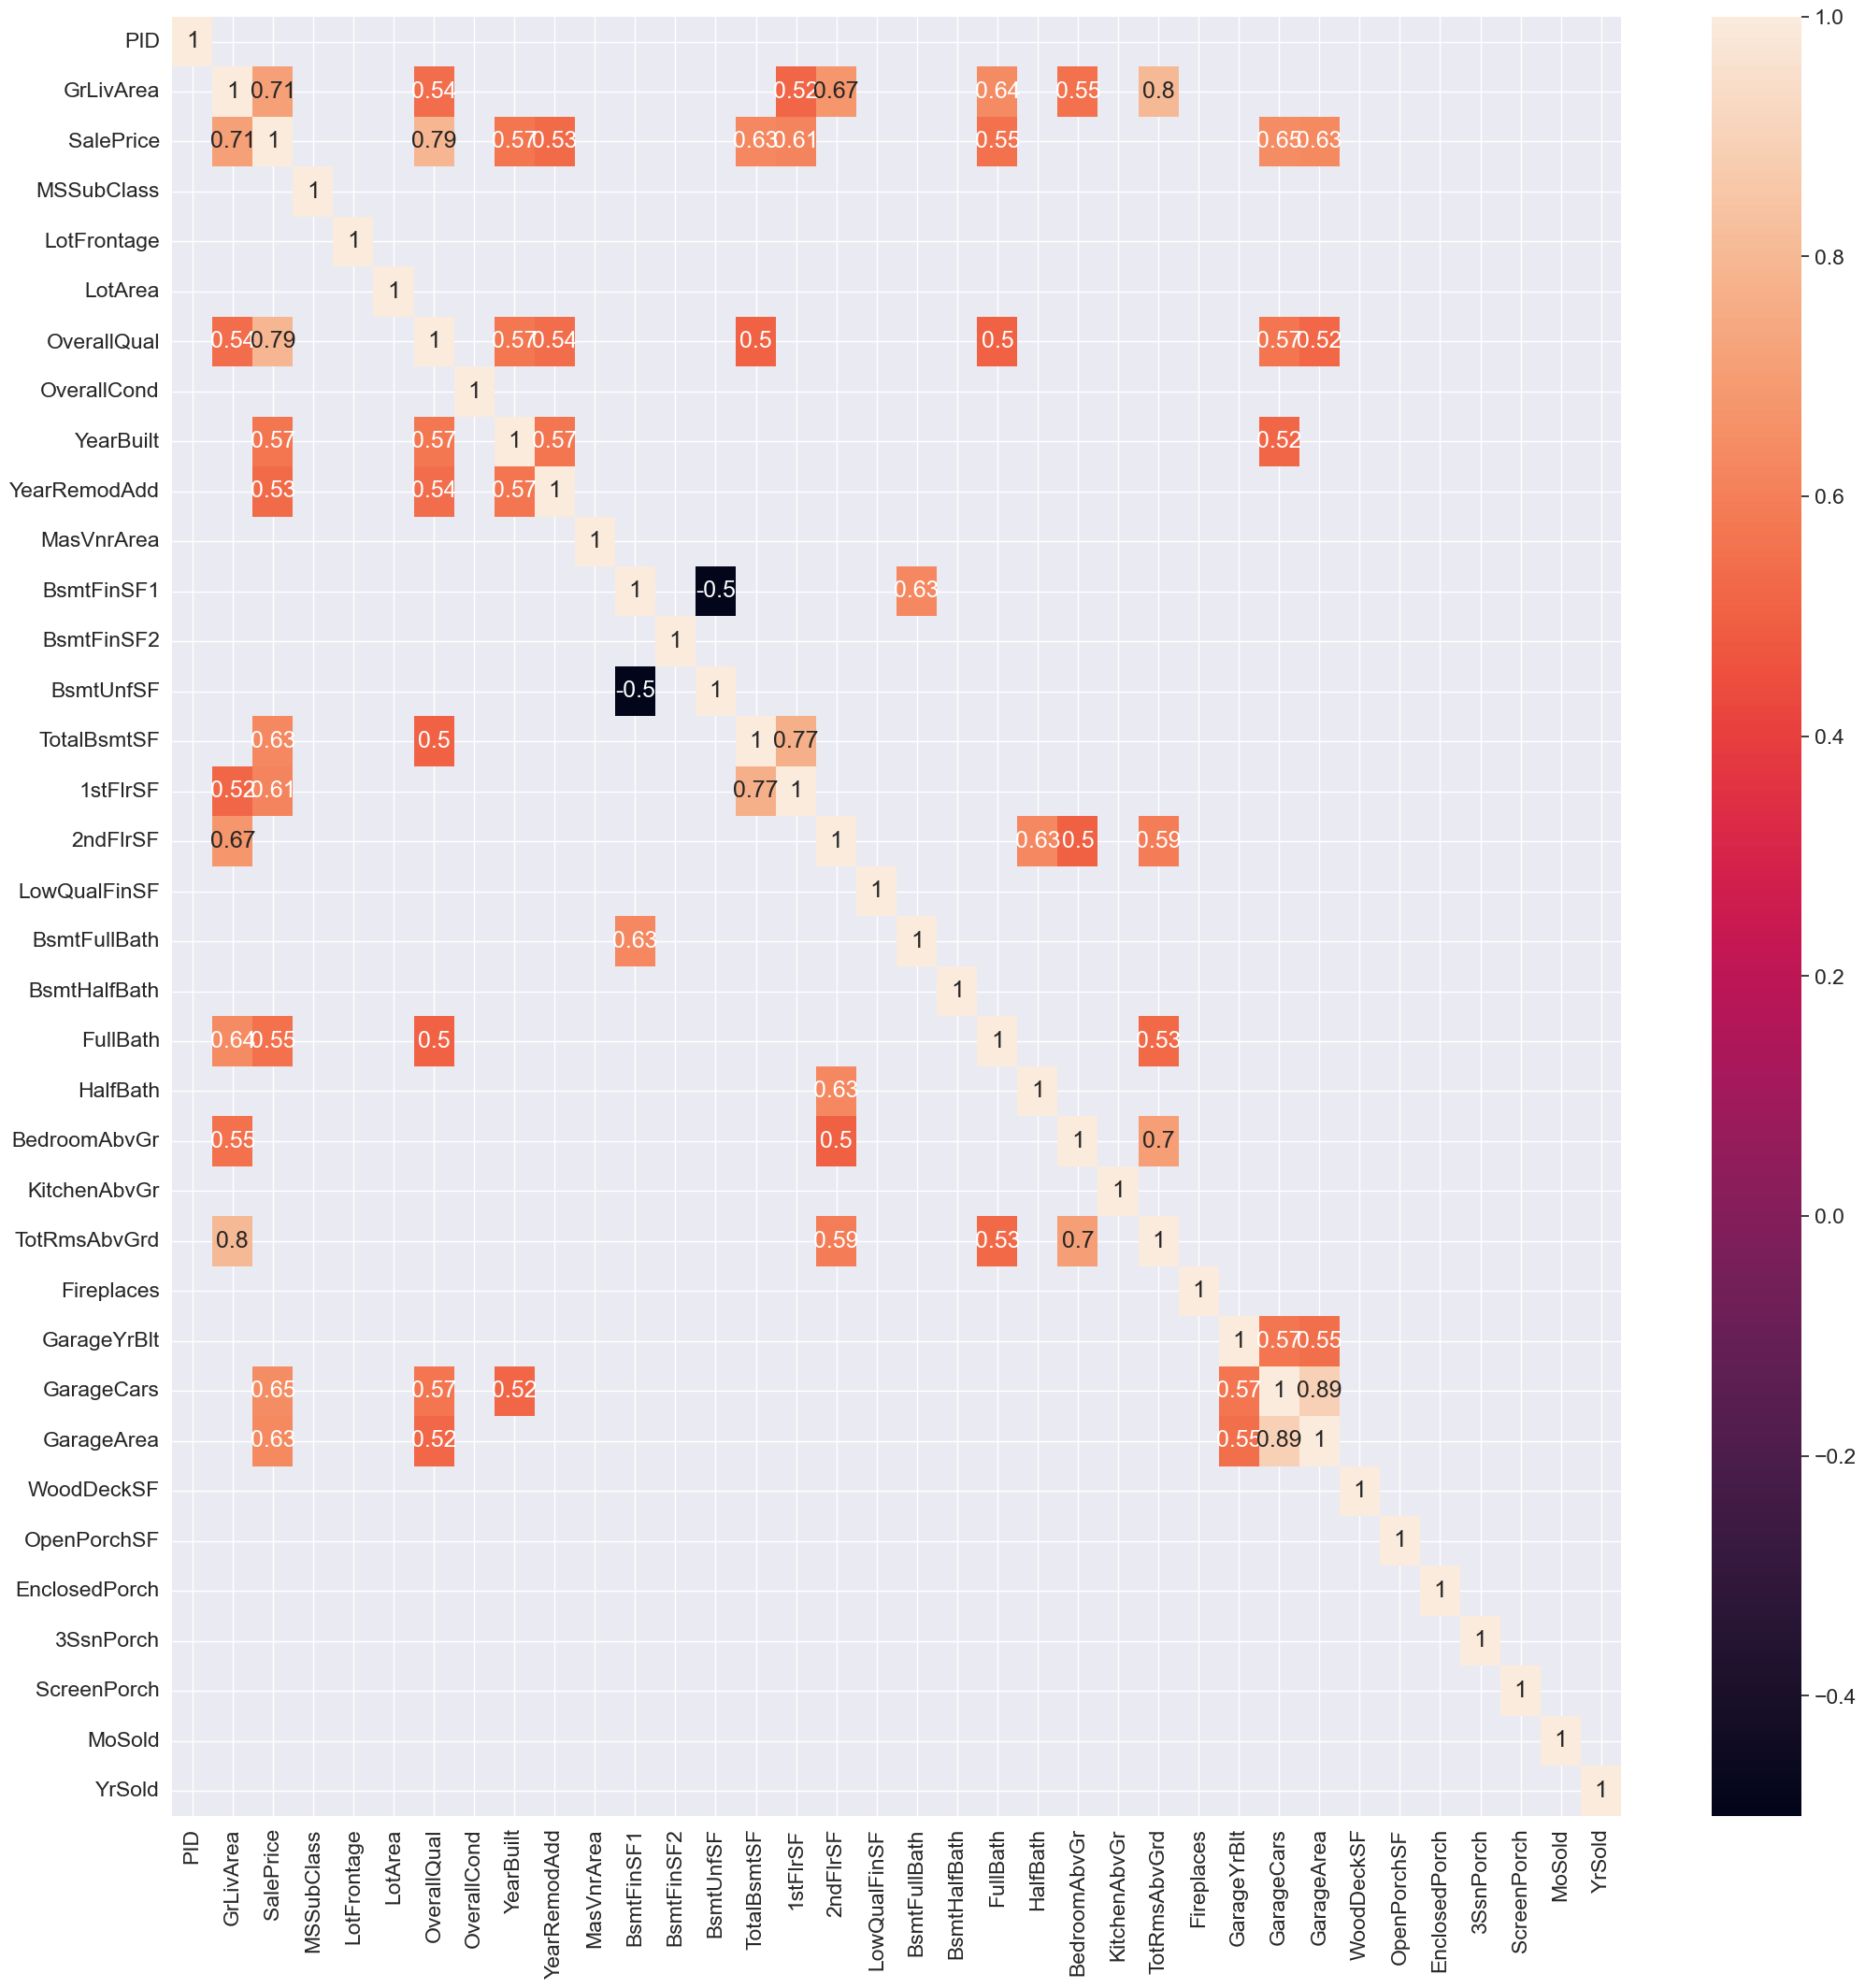

In [2256]:
train_numerics = train.select_dtypes(include=[np.number])
train_corr = train_numerics.corr()
heatmap = sns.heatmap(train_corr[abs(train_corr) > 0.5], annot=True)  
sns.set(rc={'figure.figsize':(25,25)})
plt.show()

In [2257]:
condition = abs(train_corr['SalePrice']) > 0.5
columns_abv_threshold = train_corr.columns[condition].tolist()
filtered_list = list(filter(lambda x: x not in columns_to_exclude, columns_abv_threshold))
columns_abv_threshold = filtered_list
columns_abv_threshold

['SalePrice', 'OverallQual', 'GarageArea']

Here are the top 10 results from the correlation matrix for numerical features:

In [2258]:
train_top10_corr = train_corr['SalePrice'].sort_values(ascending = False).head(11)
train_top10_corr

SalePrice       1.000000
OverallQual     0.790983
GrLivArea       0.708676
GarageCars      0.645784
GarageArea      0.634398
TotalBsmtSF     0.627229
1stFlrSF        0.613702
YearBuilt       0.568551
FullBath        0.550805
YearRemodAdd    0.534056
Fireplaces      0.476183
Name: SalePrice, dtype: float64

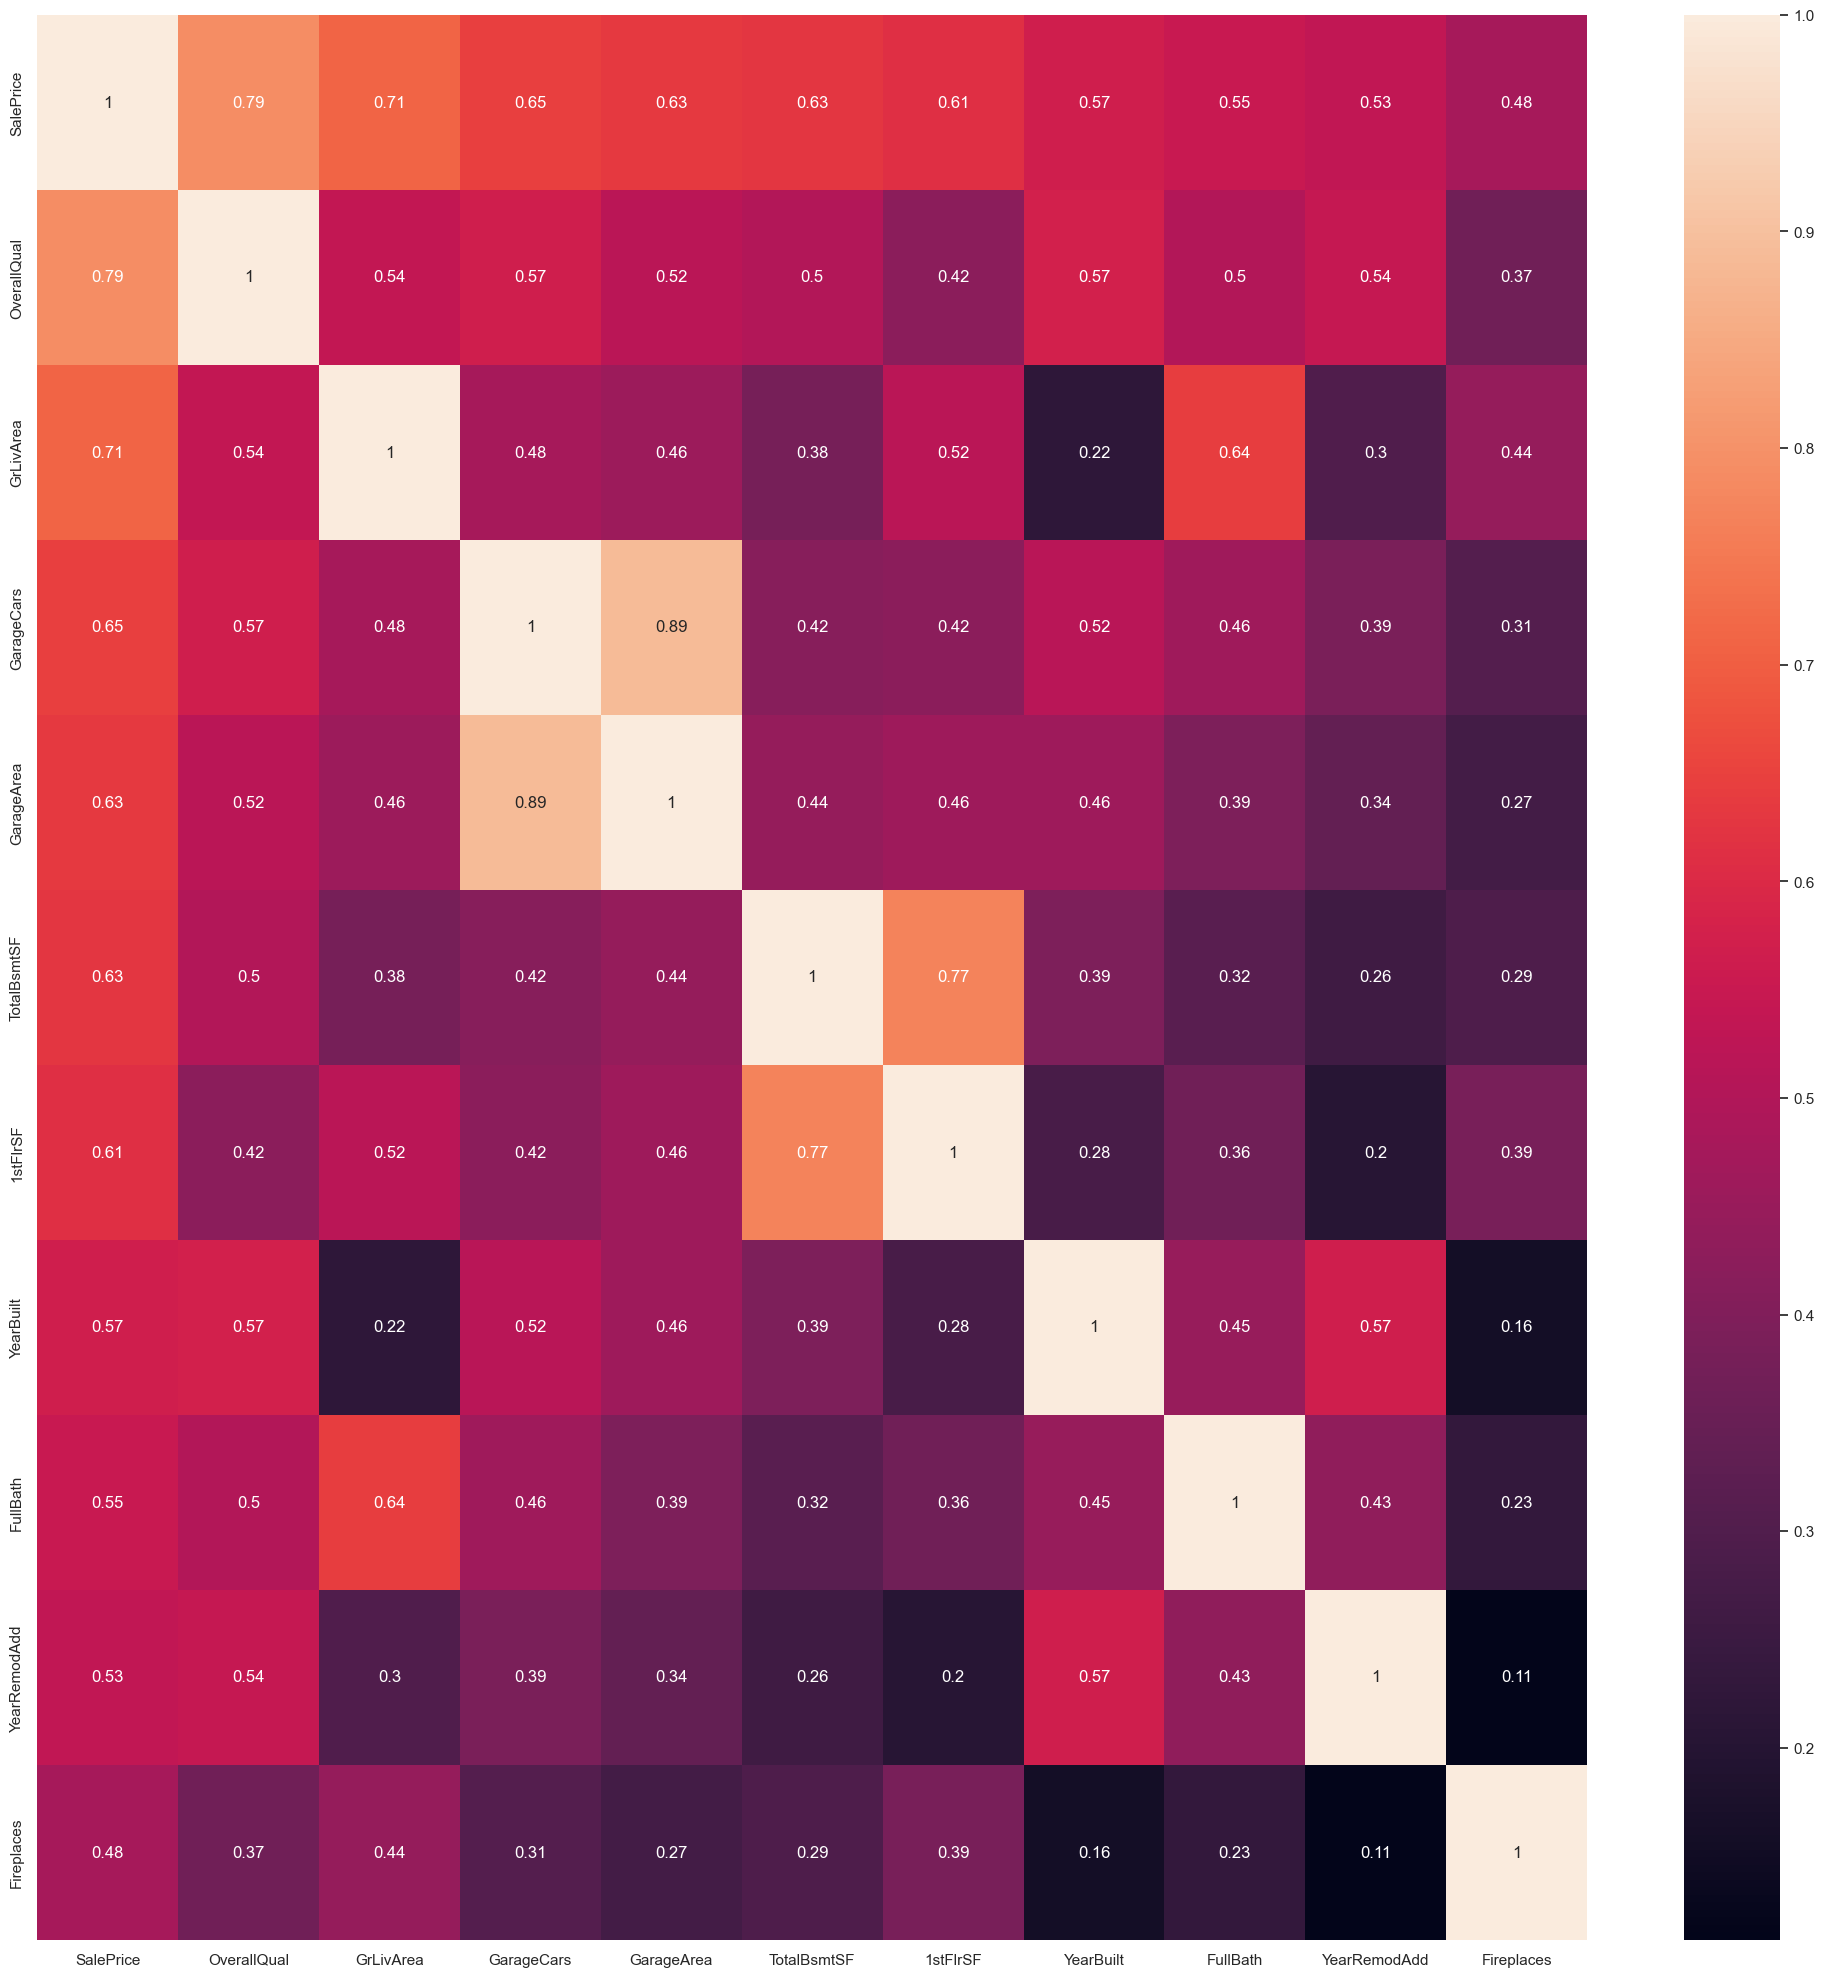

<Figure size 1000x800 with 0 Axes>

In [2259]:

top_10_corr = train_numerics[train_corr['SalePrice'].nlargest(11).index].corr()
heatmap_top10 = sns.heatmap(top_10_corr, annot=True)
heatmap_top10
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)

Lets look at the categorical variables as well:

In [2260]:
train_cats = train.select_dtypes(exclude=[np.number])

train_cats_encoded = pd.get_dummies(train, columns=train_cats.columns, drop_first=True)

train_cats_encoded

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondit

In [2261]:
train.dtypes.value_counts()

object     41
int64      25
float64    11
dtype: int64

In [2262]:
OH_encoder = OneHotEncoder(sparse_output = False, drop = 'first')
cat_cols = list(train.select_dtypes(include='object').columns)
encoded_nums = OH_encoder.fit_transform(train[cat_cols])
encoded_cols = list(OH_encoder.get_feature_names_out())
train[encoded_cols] = encoded_nums
train = train.drop(columns=cat_cols)
train

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondit

# Feature Engineering

In [2263]:
train['TotalHouseSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']
train.TotalHouseSF

0       1712.0
1       2098.0
2       1838.0
3       1444.0
4       2475.0
         ...  
2575    1904.0
2576    1733.0
2577    3003.0
2578    2827.0
2579    2688.0
Name: TotalHouseSF, Length: 2553, dtype: float64

In [2264]:
train['TotalBathroomCount'] = train['BsmtFullBath'] + train['FullBath'] + (0.5 * train['BsmtHalfBath']) + (0.5 * train['HalfBath'])
train.TotalBathroomCount

# BsmtFullBath: Basement full bathrooms

# BsmtHalfBath: Basement half bathrooms

# FullBath: Full bathrooms above grade

# HalfBath: Half baths above grade

0       2.0
1       3.0
2       1.0
3       1.0
4       3.5
       ... 
2575    1.0
2576    2.0
2577    2.0
2578    3.5
2579    2.5
Name: TotalBathroomCount, Length: 2553, dtype: float64

I saw there was alot of mention of SF for outdoor additions to houses, I wanted to create a way to encapture the value there:

In [2265]:
train['QualityOutdoorSF'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch'] # + train['PoolArea']

# WoodDeckSF: Wood deck area in square feet

# OpenPorchSF: Open porch area in square feet

# EnclosedPorch: Enclosed porch area in square feet

# 3SsnPorch: Three season porch area in square feet

# ScreenPorch: Screen porch area in square feet

# PoolArea: Pool area in square feet ---- already removed this column

train.QualityOutdoorSF

Also, two of our higher predicting was YrBuilt and YrRemodAdd, can we combine somehow to get that value out of one feature?

In [2266]:
train['YearAndRemodAvg'] = (train['YearRemodAdd'] + train['YearBuilt'])/2

Potentially a lot_frontage to lot_size ratio?







FullHouseSF - Lot Size?

In [2267]:
train['NonHouseSF'] = train['TotalHouseSF'] - train['LotArea']

Quality in house stuff?

In [2268]:
#LowQualFinSF: Low quality finished square feet (all floors)
train['HighQualFinSF'] = train['TotalHouseSF'] - train['LowQualFinSF']

In [2269]:
train.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'TotalHouseSF', 'TotalBathroomCount',
       'QualityOutdoorSF', 'YearAndRemodAvg', 'NonHouseSF', 'HighQualFinSF'],
      dtype='object', length=263)

In [2270]:
train['HouseLotRatio'] = train['TotalHouseSF'] / train['LotArea'] * 100
train['FrontageLotRatio'] = train['LotFrontage'] / train['LotArea'] * 100
train['QualityOutdoorLotRatio'] = train['QualityOutdoorSF'] / train['LotArea'] * 100


In [2271]:
train

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondit

Viewing all the new features in the correlation matrix to see what may be a good addition to the model:

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'SalePrice'),
  Text(1.5, 0, 'OverallQual'),
  Text(2.5, 0, 'MasVnrArea'),
  Text(3.5, 0, 'BsmtFinSF1'),
  Text(4.5, 0, 'TotRmsAbvGrd'),
  Text(5.5, 0, 'GarageArea'),
  Text(6.5, 0, 'BsmtQual_TA'),
  Text(7.5, 0, 'TotalHouseSF'),
  Text(8.5, 0, 'YearAndRemodAvg')])

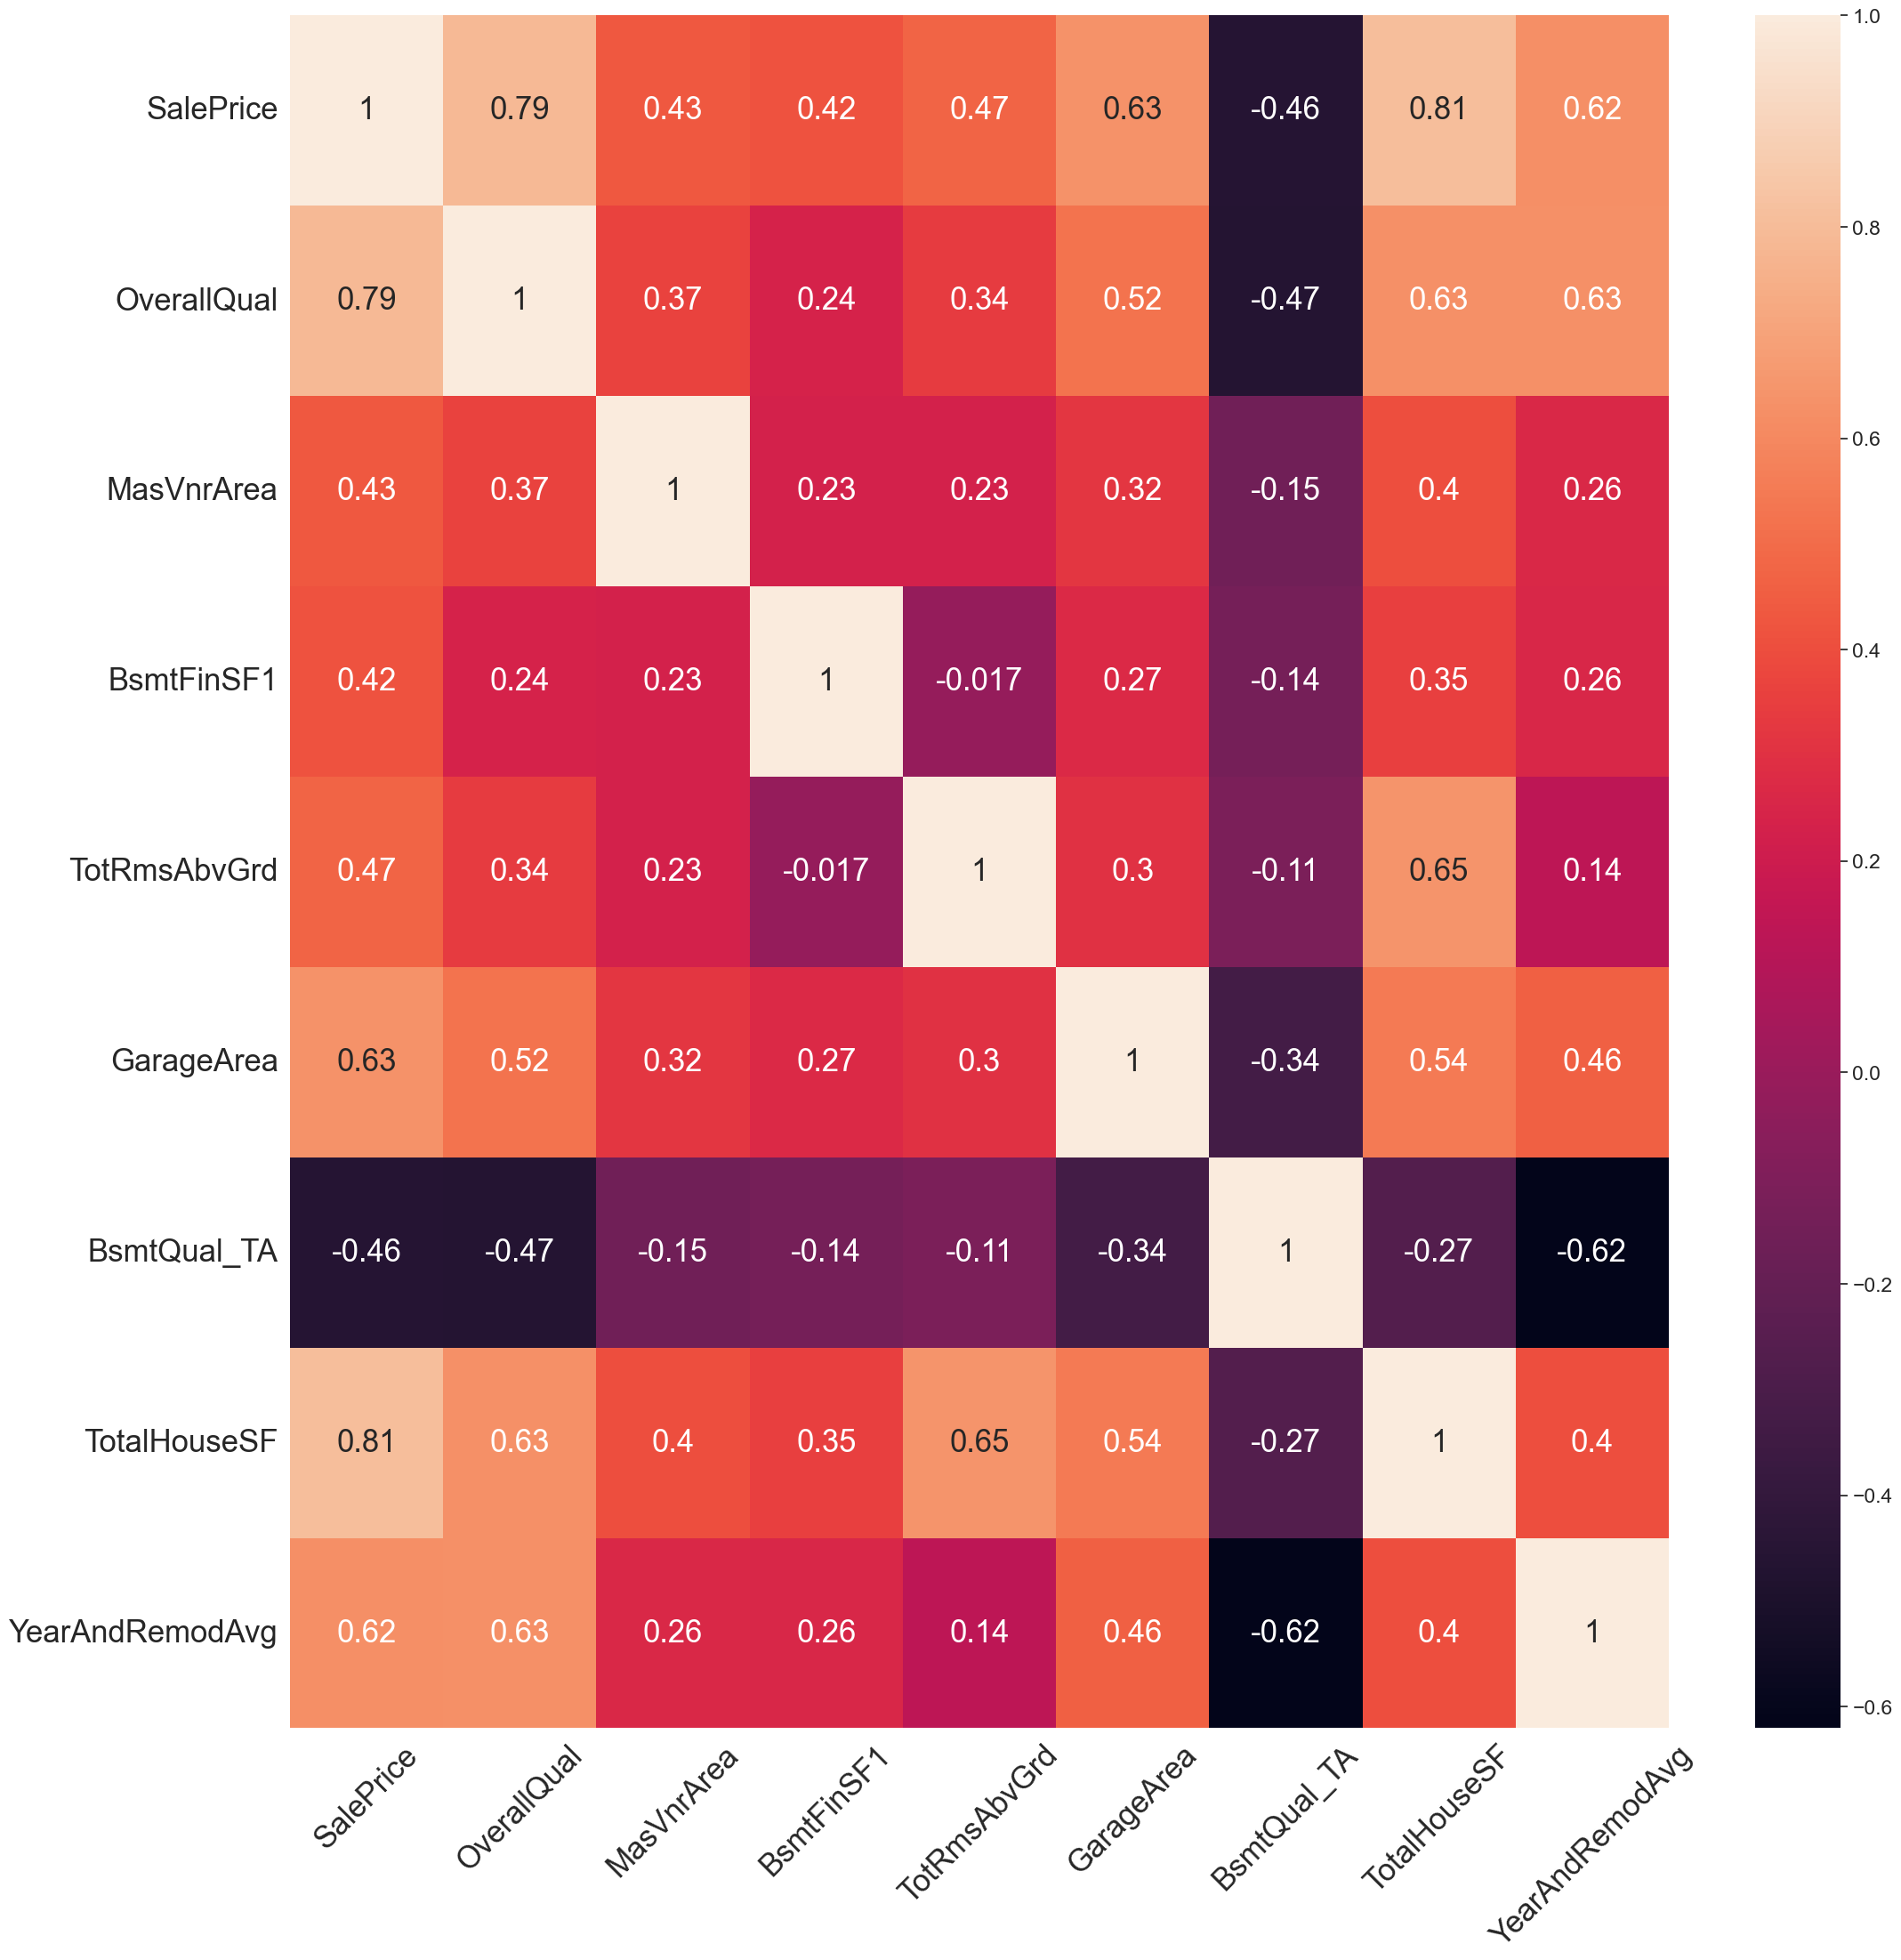

In [2272]:
#code to run before modeling, in multiple areas

train_numerics = train.select_dtypes(include=[np.number])
train_numerics.drop(columns=columns_to_exclude)
train_corr = train_numerics.corr()

condition = abs(train_corr['SalePrice']) > 0.40
columns_abv_threshold = train_corr.columns[condition].tolist()
filtered_list = list(filter(lambda x: x not in columns_to_exclude, columns_abv_threshold))
columns_abv_threshold = filtered_list


abv_threshold_corr = train[columns_abv_threshold].corr()
ft_train = train[columns_abv_threshold]
sns.heatmap(abv_threshold_corr, annot = True,annot_kws={"size": 25})
plt.yticks(rotation=0, fontsize=25)  # Adjust font size for y-axis labels
plt.xticks(rotation=45, fontsize=25)  # Adjust font size for x-axis labels

TotalHouseSF is very correlated and it will remove some of our features that are seeing some potential multicollinearity. We can still do VIF to confirm.

In [2273]:
#performing VIF on GarageArea and GarageCars to see if there is multicollinearity. Conceptually I would think so, numbers to prove.

#we will select the predictor and the target variables
predictors = ["GarageArea", "GarageCars"]
target = "SalePrice"

#subset the dataframe with these to test
subset_train = train[predictors + [target]]

#add a constant column for intercept
subset_train = add_constant(subset_train)

# Calculate VIF for the predictor variables
vif_Garage = pd.DataFrame()
vif_Garage['Variables'] = subset_train.columns
vif_Garage['VIF'] = [variance_inflation_factor(subset_train.values, i) for i in range(subset_train.shape[1])]

# Display the VIF DataFrame for 'ab' and 'ac'
print(vif_Garage[vif_Garage['Variables'].isin(predictors)])

    Variables       VIF
1  GarageArea  4.905105
2  GarageCars  5.027748


As shown, we can see there is a moderate to high amount of multicollinearity among these two columns, I will remove GarageCars and keep GarageArea. Part of the thought is area is covering the space of the garage and not just counting by cars which can be varying. Some people have wider/longer cars, workshops in their garage, etc.

Right now, some good concrete features to include are TotalHouseSF and GarageArea, I am going to start keeping track of which columns to remove from our first top 10 model.

In [2281]:
#start a list to keep track of what we want to keep out of our top 10
columns_to_exclude = ['Exterior2nd_VinylSd','GarageType_Detchd','Foundation_PConc','BsmtFinType1_GLQ','HighQualFinSF', 'Exterior1st_VinylSd','GarageFinish_Unf', 'KitchenQual_Gd', 'KitchenQual_TA','Fireplaces','ExterQual_Gd','TotalBathroomCount','FireplaceQu_NoFireplace','GrLivArea','ExterQual_TA','YearBuilt','YearRemodAdd','GarageCars','1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath']
#'BsmtFinType1_GLQ', 'BsmtFinType1_GLQ', 'HighQualFinSF','Exterior1st_VinylSd', 'Foundation_PConc', 
#create those into a numerics df alongside a correlation matrix
ft_numerics = train_numerics.drop(columns=columns_to_exclude)
ft_corr = ft_numerics.corr()


# heatmap = sns.heatmap(ft_numerics[ft_corr['SalePrice'].nlargest(11).index].corr(), annot=True,annot_kws={"size": 25})  
# heatmap
# sns.set(rc={'figure.figsize':(25,25)})
# plt.yticks(rotation=0, fontsize=25)  # Adjust font size for y-axis labels
# plt.xticks(rotation=45, fontsize=25)  # Adjust font size for x-axis labels

#code to run before modeling, in multiple areas

train_numerics = train.select_dtypes(include=[np.number])
train_numerics.drop(columns=columns_to_exclude)
train_corr = train_numerics.corr()

condition = abs(train_corr['SalePrice']) > .20
columns_abv_threshold = train_corr.columns[condition].tolist()
filtered_list = list(filter(lambda x: x not in columns_to_exclude, columns_abv_threshold))
columns_abv_threshold = filtered_list


abv_threshold_corr = train[columns_abv_threshold].corr()
ft_train = train[columns_abv_threshold]

I see TotalHouseSF & GrLivArea are fairly high in correlation, 0.86 also TotRmsAbvGrd at 0.8. I will do a VIF to see if they are showing multicollinearity.

In [2282]:
#performing VIF on TotalHouseSF, TotRmsAbvGrd and GrLivArea to see if there is multicollinearity. Would make sense, more SF, more rooms.

#we will select the predictor and the target variables
predictors = [col for col in ft_train.columns if col != 'SalePrice']

target = "SalePrice"

#subset the dataframe with these to test
subset_train = train[predictors + [target]]

#add a constant column for intercept
subset_train = add_constant(subset_train)

# Calculate VIF for the predictor variables
vif_Garage = pd.DataFrame()
vif_Garage['Variables'] = subset_train.columns
vif_Garage['VIF'] = [variance_inflation_factor(subset_train.values, i) for i in range(subset_train.shape[1])]

# Display the VIF DataFrame for 'ab' and 'ac'
print(vif_Garage[vif_Garage['Variables'].isin(predictors)])

print('\n')

#performing VIF on just the lower amounts to see if there is multicollinearity.

#we will select the predictor and the target variables
predictors = ["ExterQual_TA"]
target = "SalePrice"

#subset the dataframe with these to test
subset_train = train[predictors + [target]]

#add a constant column for intercept
subset_train = add_constant(subset_train)

# Calculate VIF for the predictor variables
vif_Garage = pd.DataFrame()
vif_Garage['Variables'] = subset_train.columns
vif_Garage['VIF'] = [variance_inflation_factor(subset_train.values, i) for i in range(subset_train.shape[1])]

# Display the VIF DataFrame for 'ab' and 'ac'
print(vif_Garage[vif_Garage['Variables'].isin(predictors)])

#we will select the predictor and the target variables
predictors = ["TotalHouseSF", 'HighQualFinSF']
target = "SalePrice"

#subset the dataframe with these to test
subset_train = train[predictors + [target]]

#add a constant column for intercept
subset_train = add_constant(subset_train)

# Calculate VIF for the predictor variables
vif_Garage = pd.DataFrame()
vif_Garage['Variables'] = subset_train.columns
vif_Garage['VIF'] = [variance_inflation_factor(subset_train.values, i) for i in range(subset_train.shape[1])]

# Display the VIF DataFrame for 'ab' and 'ac'
print(vif_Garage[vif_Garage['Variables'].isin(predictors)])

                Variables          VIF
1                     PID     1.490472
2             LotFrontage     1.599476
3                 LotArea     1.376762
4             OverallQual     3.491709
5              MasVnrArea     2.419963
6              BsmtFinSF1     1.613804
7            TotRmsAbvGrd     2.626830
8             GarageYrBlt  1316.465498
9              GarageArea     2.980804
10             WoodDeckSF     3.466992
11            OpenPorchSF     1.873264
12            MSZoning_RL     3.805394
13            MSZoning_RM     4.527361
14           LotShape_Reg     1.220328
15   Neighborhood_NoRidge     1.355026
16   Neighborhood_NridgHt     1.511575
17   Neighborhood_OldTown     1.709303
18      HouseStyle_2Story     1.626428
19     MasVnrType_BrkFace    28.931870
20        MasVnrType_None    32.250045
21       MasVnrType_Stone     9.518438
22      Foundation_CBlock     1.923025
23            BsmtQual_Gd     3.485361
24            BsmtQual_TA     3.842483
25        BsmtExposure_Gd

/Users/briandrewes/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in scalar divide



It would seem GrLivArea has a high VIF compared to TotalHouseSF, we will keep TotRmsAbvGrd though.

Our list of columns to exclude grows. I am also removing BsmtSF areas since I missed that previously.

# Model Building

Let's start with a simple linear regression on the basic numeric variables we got after making one feature and clearing some multicollinearity.

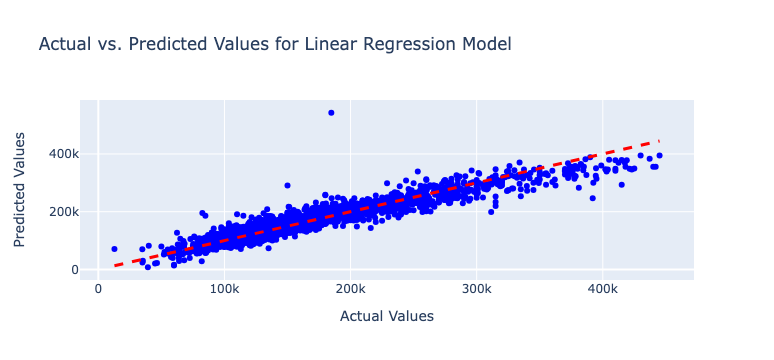

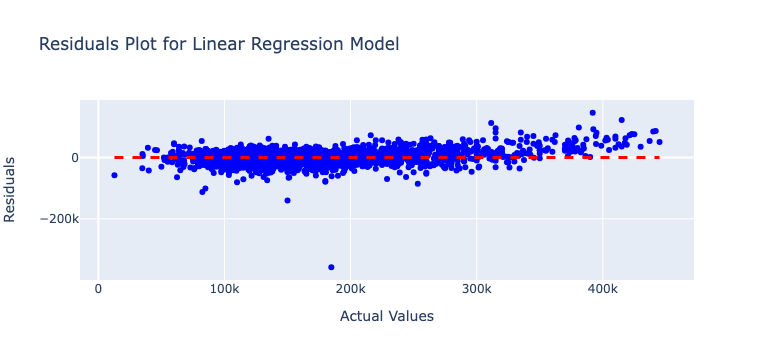

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     446.6
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:58:29   Log-Likelihood:                -29244.
No. Observations:                2553   AIC:                         5.858e+04
Df Residuals:                    2509   BIC:                         5.883e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -9.36e+

In [2283]:

#the features will be X (independent variables)
X = ft_train.drop('SalePrice', axis=1)
X_array = X.values
#the target (dependent variable) will be y
y = ft_train['SalePrice']
y_array = y.values


# Perform linear regression using scikit-learn
model = LinearRegression()
model.fit(X, y)

X_with_intercept = sm.add_constant(X)  # Add intercept term
model_sm = sm.OLS(y,X_with_intercept).fit()

# Make predictions using the trained model
predictions = model.predict(X)

# Create a scatter plot with Plotly
fig = go.Figure()

# Add a scatter plot for actual vs. predicted values
fig.add_trace(go.Scatter(x=y, y=predictions, mode='markers', marker=dict(color='blue'), 
                         name='Actual vs. Predicted'))
# Add a diagonal line for perfect predictions
fig.add_shape(type="line", x0=min(y), x1=max(y), y0=min(y), y1=max(y),
              line=dict(color="red", width=3, dash='dash'),
              name="Perfect Predictions")

# Update layout and axis labels
fig.update_layout(title="Actual vs. Predicted Values for Linear Regression Model",
                  xaxis_title="Actual Values",
                  yaxis_title="Predicted Values")

# Show the plot
fig.show()


# Plotting residuals
residuals = y - predictions
fig2 = go.Figure()

# Add a scatter plot for actual values and residuals
fig2.add_trace(go.Scatter(x=y, y=residuals, mode='markers', marker=dict(color='blue'), 
                         name='Residuals'))

# Add a horizontal line at y=0 for reference
fig2.add_shape(type="line", x0=min(y), x1=max(y), y0=0, y1=0,
              line=dict(color="red", width=3, dash='dash'),
              name="Zero Residuals Line")


fig2.update_layout(title="Residuals Plot for Linear Regression Model",
                  xaxis_title="Actual Values",
                  yaxis_title="Residuals")

fig2.show()


# Using statsmodels to check p-values
print(model_sm.summary())
print('\n')

# Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

print('\n')

print("F-statistic:", model_sm.fvalue)
print("F-statistic p-value:", model_sm.f_pvalue)

# Test Train Split Model

I was originally using the full dataset to train my model and test it on the same data. We will now look at how the results are from splitting the data.

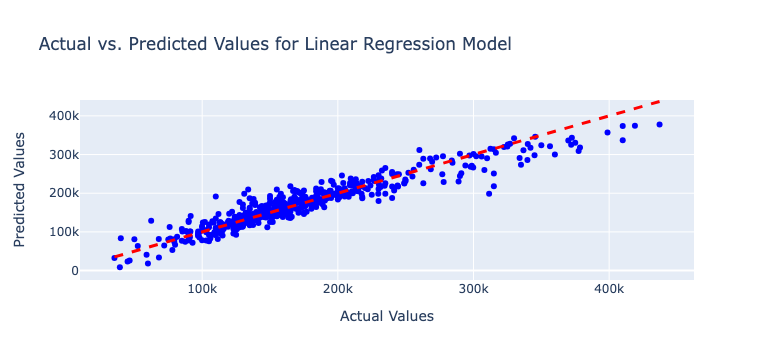

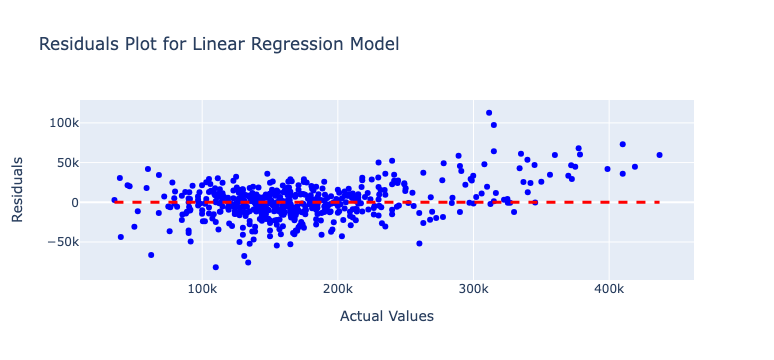

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     446.6
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:59:49   Log-Likelihood:                -29244.
No. Observations:                2553   AIC:                         5.858e+04
Df Residuals:                    2509   BIC:                         5.883e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -9.36e+

In [2284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


# Create a scatter plot with Plotly
fig = go.Figure()

# Add a scatter plot for actual vs. predicted values on the test set
fig.add_trace(go.Scatter(x=y_test, y=predictions, mode='markers', marker=dict(color='blue'), 
                         name='Actual vs. Predicted'))
# Add a diagonal line for perfect predictions
fig.add_shape(type="line", x0=min(y_test), x1=max(y_test), y0=min(y_test), y1=max(y_test),
              line=dict(color="red", width=3, dash='dash'),
              name="Perfect Predictions")

# Update layout and axis labels
fig.update_layout(title="Actual vs. Predicted Values for Linear Regression Model",
                  xaxis_title="Actual Values",
                  yaxis_title="Predicted Values")

# Show the plot
fig.show()

# Plotting residuals
residuals = y_test - predictions
fig2 = go.Figure()

# Add a scatter plot for actual values and residuals on the test set
fig2.add_trace(go.Scatter(x=y_test, y=residuals, mode='markers', marker=dict(color='blue'), 
                         name='Residuals'))

# Add a horizontal line at y=0 for reference
fig2.add_shape(type="line", x0=min(y_test), x1=max(y_test), y0=0, y1=0,
              line=dict(color="red", width=3, dash='dash'),
              name="Zero Residuals Line")

fig2.update_layout(title="Residuals Plot for Linear Regression Model",
                  xaxis_title="Actual Values",
                  yaxis_title="Residuals")

fig2.show()


print(model_sm.summary())


print('\n')

# Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE) on the test set:", mse)

# Root Mean Squared Error (RMSE) on the test set
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE) on the test set:", rmse)

print('\n')

print("F-statistic:", model_sm.fvalue)
print("F-statistic p-value:", model_sm.f_pvalue)

In [2313]:

summ_df = pd.DataFrame.from_records(model_sm.summary().tables[1])

In [2364]:
df = pd.DataFrame.from_records(summ_df)
header = df.iloc[0] # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = header


df.iloc[:,1][1] + df.iloc[:,1][1] 

TypeError: unsupported operand type(s) for +: 'Cell' and 'Cell'